# Week 1 - K-means, K-medoids, EM-algorithm

This week is going to be about clustering. We will be looking at a couple of theoretical exercises and a practical exercise.

In [2]:
%matplotlib inline

import math 
import itertools
import numpy as np
from matplotlib import pyplot as plt

# Local imports
import sys
sys.path.append("../utilities")
from gmm import GMM
from load_data import load_iris, load_iris_PC, index_to_feature

## Gaussian Mixtures and the EM-Algorithm

Recall, that the Gaussian Mixture Model is a latens variable model composed of $K$ Gaussians, each having its own mean $\mu_i$, covariance matrix $\Sigma_i$, and prior probability $\pi_i$. The joint probability $P(X_i, Z_i)$, where $X_i$ are observational random variables and $Z_i$ are latent random variables, is then defined as follows:

$$
P(X_i = x, Z_i = z) = \pi_i * \mathcal{N}(x; \mu_i, \Sigma_i)
$$

and furthermore, the marginal probability of the data point $X_i$ is defined as:

$$
P(X_i = x) = \sum_{k=1}^K P(X_i = x, Z_i = k)\\
\quad\quad= \sum_{k=1}^{K} P(y_k)P(X_i = x | Z_i = k)\\
\quad= \sum_{k=1}^K \pi_k  \mathcal{N}(x; \mu_k, \Sigma_k)
$$

Below is an extension of a Gaussian Mixture Model stub (`GMM`), which has the method signatures for the missing functions. Try to fill out the methods and run the experiments afterwards.

Besides the methods shown here, the `GMM` class has a `fit` and a `predict` method, which both takes as input the data and returns `void` and cluster indexes, respectively. Both functions will use the functions that you implement below.


**TODO:** Add missing content here.

In [ ]:
from gmm import GMM

class MyGMM(GMM):
    def initialize_parameters(self, X):
        """
            This function should utilize information from the data to initialize
            the parameters of the model.
            In particular, it should compute initial values for my, Sigma, and pi.

            Args:
                X (matrix, [n, d]): Data to be used for initialization.

            Returns:
                Tuple (mu, Sigma, pi), 
                    mu has size        [K, d]
                    Sigma has size    [K, d, d]
                    pi has size        [K]
        """
        # TODO: what should the values be for initializing mu, Sigma and pi
        
        return mu, Sigma, pi


    def prior(self): 
        """
            Returns the prior probabilities p(Y).

            Returns:
                Vector of size        [K]
        """
        # TODO: what is the prior probability?
        return prior


    def posterior(self, X):
        """
            The E-step of the EM algorithm. 
            Returns the posterior probability p(y|X)

            Args:
                X (matrix, [n,  d]): Data to compute posterior for.

            Returns:
                Matrix of size        [n, K]
        """
        # TODO: what is the posterior probability?
        
        return posterior
        

    def m_step(self, X, P):
        """
            Update the estimates of mu, Sigma, and pi, given the current
            posterior probabilities.

            Args:
                X (matrix, [n, d]): Data to be used for initialization.
                P (matrix, [n, K]): The posterior probabilities for the n samples.

            Returns:
                Tuple (mu, Sigma, pi), 
                    mu has size        [K, d]
                    Sigma has size    [K, d, d]
                    pi has size        [K]
        """
        # TODO: what is the values of mu, Sigma, and pi that maximizes the expectation?
        return  mu_hat, Si_hat, pi_hat


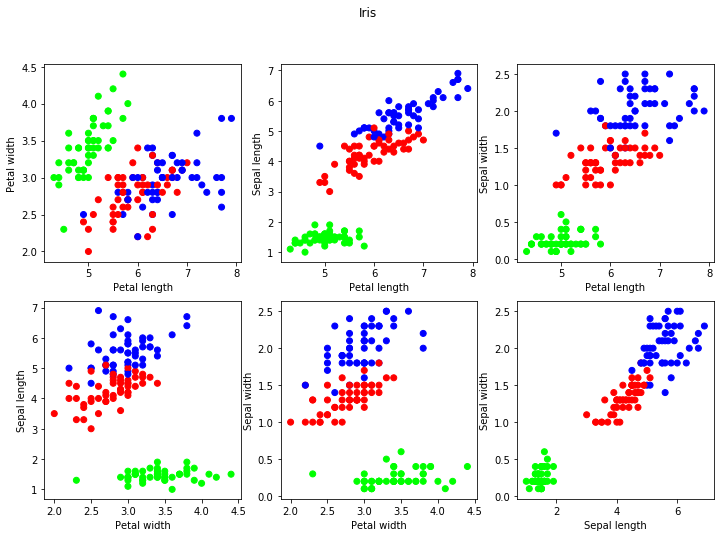

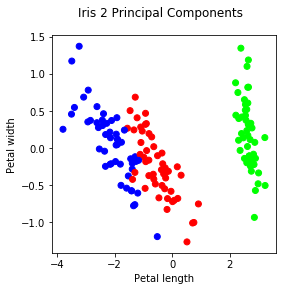

In [23]:
# Let's plot it to see the actual classes 
def plot_iris(X, y, title=''):
    # Plotting
    _, d = X.shape
    
    combinations = list(itertools.combinations(np.arange(d), 2))
    
    cols    = min(3, len(combinations) )
    rows    = math.ceil(len(combinations)/cols)
    fig, ax = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))
    
    if len(title) > 0: fig.suptitle(title)
    
    # Fix indexing when there are few plots:w
    if rows == 1: ax = [ax]
    if cols == 1: ax = [ax]

    c       = 0
    for i, j in combinations:
        m = c // cols
        n = c % cols
        ax[m][n].scatter(X[:,i], X[:,j], c=y)
        ax[m][n].set_xlabel(index_to_feature[i])
        ax[m][n].set_ylabel(index_to_feature[j])
        c += 1 
    # fig.tight_layout()

# Load the Iris data set
X , y    = load_iris()
X_, y_   = load_iris_PC()

plot_iris(X, y, 'Iris')
plot_iris(X_, y_, 'Iris 2 Principal Components')

In [ ]:
# Tiny experiment
K       = 3
gmm     = MyGMM(K)
gmm.fit(X_, max_iter=100)

plot_iris(X_, gmm.predict(X))